# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN  
from sklearn.metrics import silhouette_score 
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

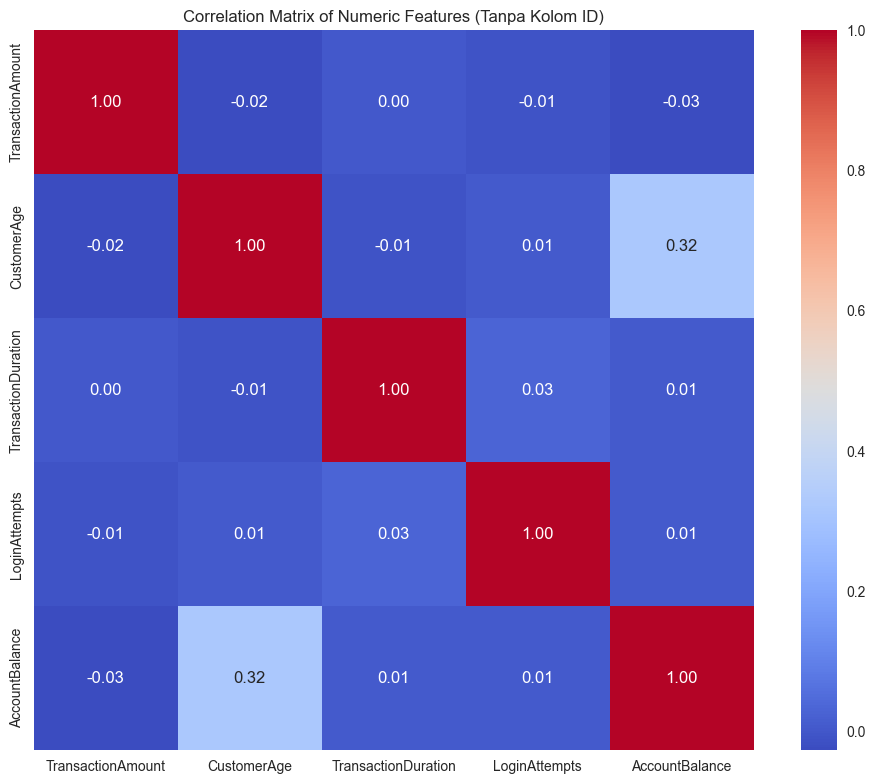

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Drop kolom ID karena tidak relevan untuk korelasi
df_corr = df.drop(columns=[
    'TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'
])
# Ambil hanya kolom numerik
df_numeric = df_corr.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Features (Tanpa Kolom ID)")
plt.tight_layout()
plt.show()

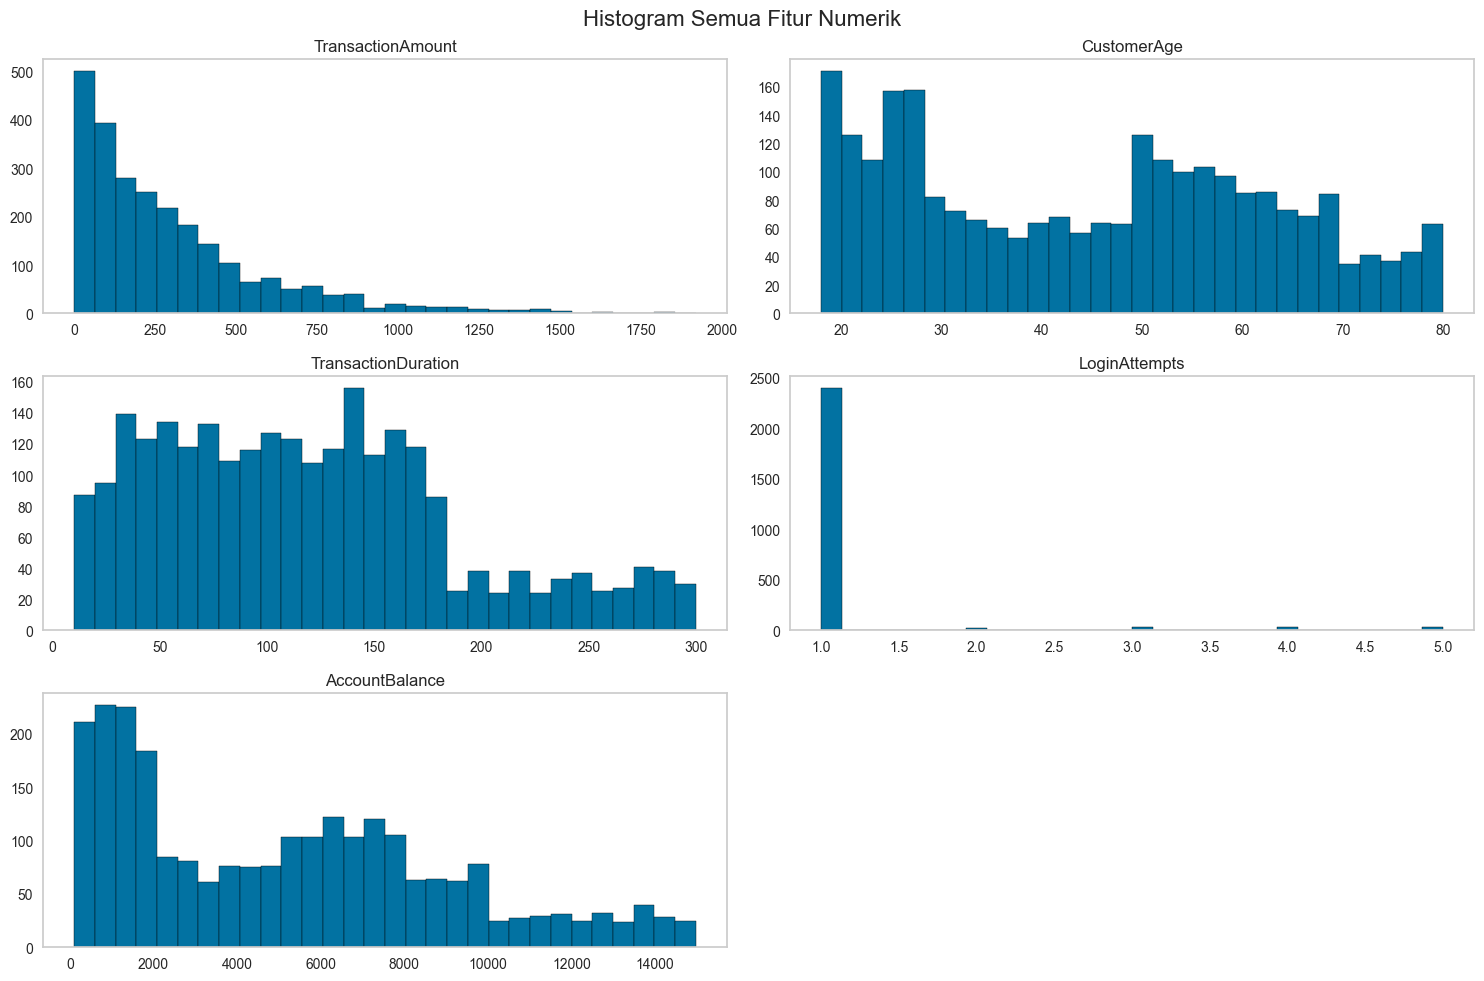

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df_numeric.hist(
    figsize=(15, 10),
    bins=30,
    edgecolor='black',
    grid=False
)

plt.suptitle("Histogram Semua Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # memberi ruang untuk judul
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

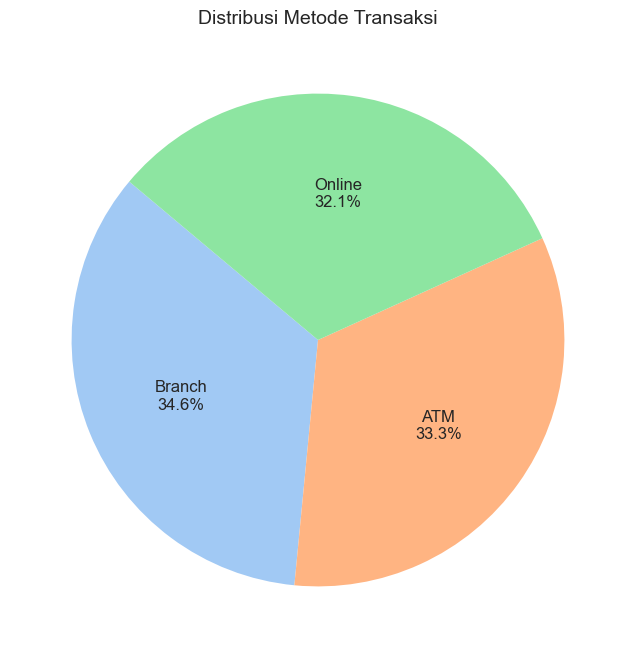

C:\Users\andre\AppData\Local\Temp\ipykernel_14280\3783862992.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit['AmountCategory'] = pd.cut(df_credit['TransactionAmount'], bins=bins, labels=labels, right=False)
C:\Users\andre\AppData\Local\Temp\ipykernel_14280\3783862992.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_group = df_credit.groupby(['AmountCategory', 'Channel']).size().reset_index(name='Count')


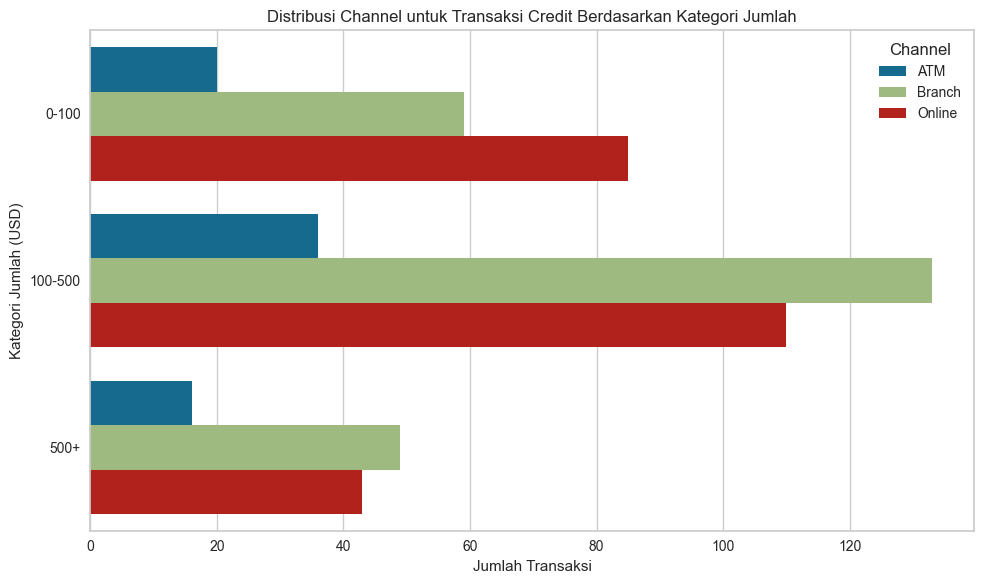

C:\Users\andre\AppData\Local\Temp\ipykernel_14280\3783862992.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debit['AmountCategory'] = pd.cut(df_debit['TransactionAmount'], bins=bins, labels=labels, right=False)
C:\Users\andre\AppData\Local\Temp\ipykernel_14280\3783862992.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_group = df_debit.groupby(['AmountCategory', 'Channel']).size().reset_index(name='Count')


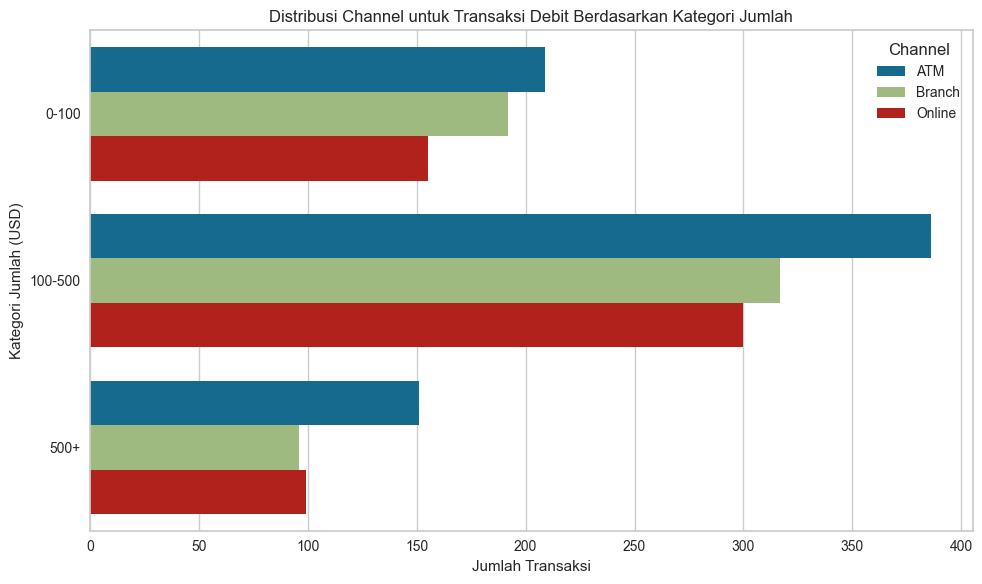

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Hitung jumlah transaksi berdasarkan channel yang digunakan
transaction_channeltype_counts = df['Channel'].value_counts()
# Buat pie chart
def make_autopct(labels):
    def my_autopct(pct):
        label = labels[my_autopct.counter]
        my_autopct.counter += 1
        return f"{label}\n{pct:.1f}%"
    my_autopct.counter = 0
    return my_autopct

labels = transaction_channeltype_counts.index

plt.figure(figsize=(8, 8))
plt.pie(
    transaction_channeltype_counts,
    labels=None,  # Tidak pakai label di luar
    autopct=make_autopct(labels),
    startangle=140,
    colors=sns.color_palette('pastel'),
    textprops={'fontsize': 12, 'ha': 'center', 'va': 'center'}
)
plt.title('Distribusi Metode Transaksi', fontsize=14)
plt.show()


# 1. Filter hanya transaksi Credit
df_credit = df[df['TransactionType'].str.lower() == 'credit']

# 2. Buat kategori berdasarkan jumlah transaksi
bins = [0, 100, 500, float('inf')]
labels = ['0-100', '100-500', '500+']
df_credit['AmountCategory'] = pd.cut(df_credit['TransactionAmount'], bins=bins, labels=labels, right=False)

# 3. Hitung jumlah transaksi berdasarkan Channel dan AmountCategory
channel_group = df_credit.groupby(['AmountCategory', 'Channel']).size().reset_index(name='Count')

# 4. Plot barplot (horizontal per kategori)
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_group, x='Count', y='AmountCategory', hue='Channel')
plt.title('Distribusi Channel untuk Transaksi Credit Berdasarkan Kategori Jumlah')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kategori Jumlah (USD)')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

# 1. Filter hanya transaksi Credit
df_debit = df[df['TransactionType'].str.lower() == 'debit']

# 2. Buat kategori berdasarkan jumlah transaksi
bins = [0, 100, 500, float('inf')]
labels = ['0-100', '100-500', '500+']
df_debit['AmountCategory'] = pd.cut(df_debit['TransactionAmount'], bins=bins, labels=labels, right=False)

# 3. Hitung jumlah transaksi berdasarkan Channel dan AmountCategory
channel_group = df_debit.groupby(['AmountCategory', 'Channel']).size().reset_index(name='Count')

# 4. Plot barplot (horizontal per kategori)
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_group, x='Count', y='AmountCategory', hue='Channel')
plt.title('Distribusi Channel untuk Transaksi Debit Berdasarkan Kategori Jumlah')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kategori Jumlah (USD)')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
#Cek Missing Value 

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [10]:
# Mengecek dataset menggunakan duplicated().sum()
duplicate_count = df.duplicated().sum()
(f"Jumlah baris duplikat: {duplicate_count}")

'Jumlah baris duplikat: 21'

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
scaler = StandardScaler()  
scaled_features = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols)

df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,-0.972736,NaN,1.121495,-0.204629,0.594263


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_drop_id = df.drop(columns=[
    'TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'
])
cols_to_replace = df_scaled.columns
df_important = df_drop_id.drop(columns=cols_to_replace)
df_important = pd.concat([df_important, df_scaled], axis=1)
df_important.head()

,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,2023-04-11 16:29:14,Debit,San Diego,ATM,Doctor,2024-11-04 8:08:08,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,2023-06-27 16:44:19,Debit,Houston,ATM,Doctor,2024-11-04 8:09:35,0.268963,1.307715,0.307960,-0.204629,2.218381
2,2023-07-10 18:16:08,Debit,Mesa,Online,Student,2024-11-04 8:07:04,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,2023-05-05 16:32:11,Debit,Raleigh,Online,Student,2024-11-04 8:09:06,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,2023-10-16 17:51:24,Credit,Atlanta,Online,Student,2024-11-04 8:06:39,-0.972736,NaN,1.121495,-0.204629,0.594263


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

df_encoded = df_important.copy()

encoders = {}
cols_to_drop = ['TransactionAmount','CustomerAge','TransactionDuration','LoginAttempts','AccountBalance']
df_encoded = df_encoded.drop(columns=cols_to_drop)

# Exclude kolom tanggal dari encoding
exclude_cols = ['PreviousTransactionDate', 'TransactionDate']
categorical_cols = [col for col in df_encoded.select_dtypes(include='object').columns if col not in exclude_cols]

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

df_encoded.head()

,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate
0,2023-04-11 16:29:14,1,36,0,0,2024-11-04 8:08:08
1,2023-06-27 16:44:19,1,15,0,0,2024-11-04 8:09:35
2,2023-07-10 18:16:08,1,23,2,3,2024-11-04 8:07:04
3,2023-05-05 16:32:11,1,33,2,3,2024-11-04 8:09:06
4,2023-10-16 17:51:24,0,1,2,3,2024-11-04 8:06:39


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_important.columns.tolist()

['PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerOccupation',
 'TransactionDate',
 'TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna().
# Menangani missing values

# 1. Untuk kolom numerik → isi dengan mean
numeric_cols = df_important.select_dtypes(include='number').columns
for col in numeric_cols:
    df_important[col] = df_important[col].fillna(df_important[col].mean())

numeric_cols = df_encoded.select_dtypes(include='number').columns
for col in numeric_cols:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mean())

# 2. Untuk kolom kategorikal → isi dengan modus (mode)
categorical_cols = df_important.select_dtypes(include='object').columns
for col in categorical_cols:
    df_important[col] = df_important[col].fillna(df_important[col].mode()[0])

categorical_cols = df_encoded.select_dtypes(include='object').columns
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])
    
# 3. Cek apakah masih ada missing values
print("Missing values in df_important:")
print(df_important.isnull().sum()[lambda x: x > 0])
print("\nMissing values in df_encoded:")
print(df_encoded.isnull().sum()[lambda x: x > 0])


Missing values in df_important:
Series([], dtype: int64)

Missing values in df_encoded:
Series([], dtype: int64)


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
before = df_important.shape[0]
df_droped = df_important.drop_duplicates()
after = df_droped.shape[0]

(f"Jumlah baris duplikat yang di-drop: {before - after}")

'Jumlah baris duplikat yang di-drop: 22'

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

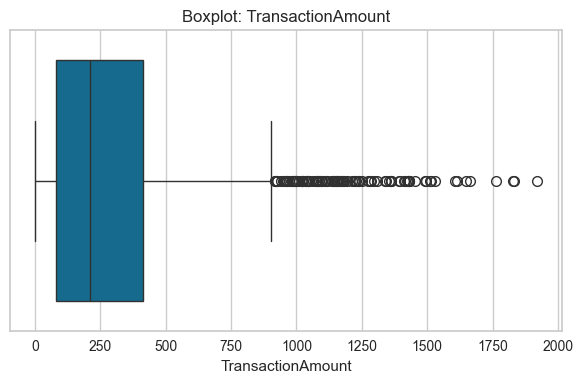

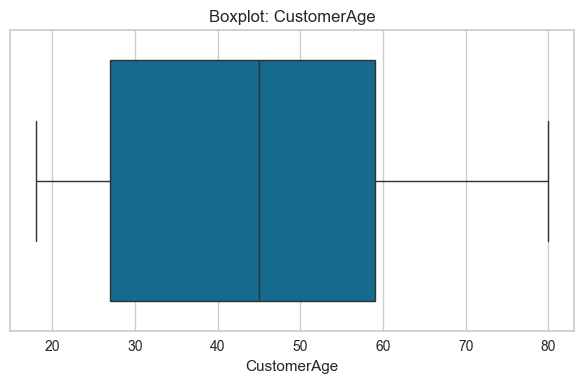

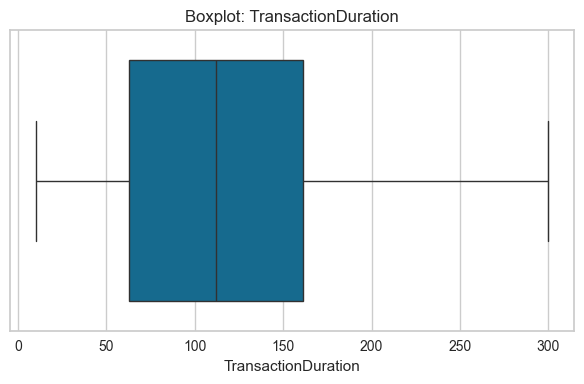

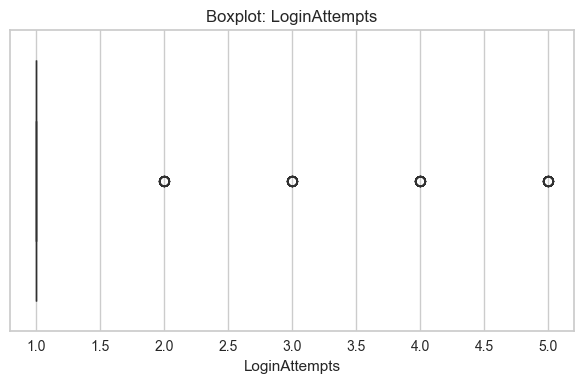

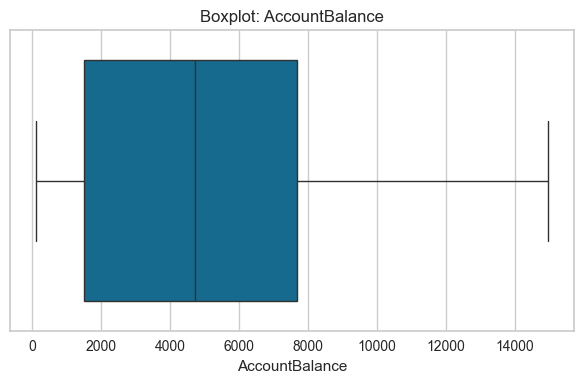

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df_selected = df_droped[numeric_cols]

# Loop untuk satu plot per kolom
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

Keputusan saya ketika melihat hasil boxplot untuk outlier saya memilih untuk membiarkan outlier dan tidak dihapus atau digantikan karena outlier hanya terjadi pada login attempts dan nominal transaksi, dimana anomali pada login attempts justru dapat dijadikan salah satu fitur penanda jika ada anomali itu bisa jadi sebuah fraud. Sama halnya seperti Transaction amount transaksi besar bisa saja terjadi jika seseorang membeli rumah tapi bisa juga terjadi ketika tabungannya sedang dikosongkan karena tertipu. 

Jadi menurut saya data akan lebih bermanfaat untuk mendeteksi fraud dan scam apabila outlier tidak dihapus.

Karena saya tidak melakukan penghapusan outlier saya memilih menggunakan StandardScaler

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Copy agar tidak mengubah df asli
df_binned = df.copy()

# --- 1. Binning untuk TransactionAmount ---
# Low < 100, Medium 100–500, High > 500
df_binned['Transaction_bin'] = pd.cut(
    df_binned['TransactionAmount'],
    bins=[-float('inf'), 100, 500, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# --- 2. Binning untuk LoginAttempts ---
# 1 (Normal), 2–3 (Suspicious), >3 (Very Suspicious)
df_binned['Login_bin'] = pd.cut(
    df_binned['LoginAttempts'],
    bins=[-float('inf'), 1, 3, float('inf')],
    labels=['Normal', 'Suspicious', 'Very Suspicious']
)

# --- 3. Encode hasil binning dengan LabelEncoder ---
le = LabelEncoder()
df_binned['Transaction_bin_encoded'] = le.fit_transform(df_binned['Transaction_bin'])
df_binned['Login_bin_encoded'] = le.fit_transform(df_binned['Login_bin'])

# Lihat hasil
df_binned[['TransactionAmount', 'Transaction_bin', 'Transaction_bin_encoded',
           'LoginAttempts', 'Login_bin', 'Login_bin_encoded']].head()

,TransactionAmount,Transaction_bin,Transaction_bin_encoded,LoginAttempts,Login_bin,Login_bin_encoded
0,14.09,Low,1,1.0,Normal,0
1,376.24,Medium,2,1.0,Normal,0
2,126.29,Medium,2,1.0,Normal,0
3,184.50,Medium,2,1.0,Normal,0
4,13.45,Low,1,1.0,Normal,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df_droped.head()

,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,2023-04-11 16:29:14,Debit,San Diego,ATM,Doctor,2024-11-04 8:08:08,-0.970546,1.419862e+00,-0.548393,-0.204629,-0.000315
1,2023-06-27 16:44:19,Debit,Houston,ATM,Doctor,2024-11-04 8:09:35,0.268963,1.307715e+00,0.307960,-0.204629,2.218381
2,2023-07-10 18:16:08,Debit,Mesa,Online,Student,2024-11-04 8:07:04,-0.586526,-1.439874e+00,-0.905207,-0.204629,-1.024091
3,2023-05-05 16:32:11,Debit,Raleigh,Online,Student,2024-11-04 8:09:06,-0.387294,-1.047361e+00,-1.347656,-0.204629,0.886694
4,2023-10-16 17:51:24,Credit,Atlanta,Online,Student,2024-11-04 8:06:39,-0.972736,1.029568e-16,1.121495,-0.204629,0.594263


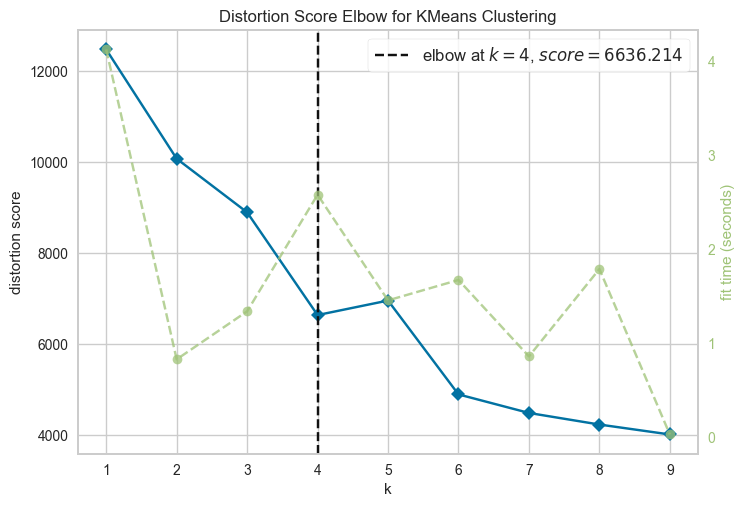

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans tanpa parameter awal
# Ambil hanya kolom numerik
df_cluster = df_droped.select_dtypes(include=['number'])

# Jalankan ElbowVisualizer dengan data numerik
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_cluster)
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_cluster)
labels = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
model_kmeans = kmeans
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df_cluster, labels)
(f'Silhouette Score (tanpa PCA): {score:.4f}')

'Silhouette Score (tanpa PCA): 0.2593'

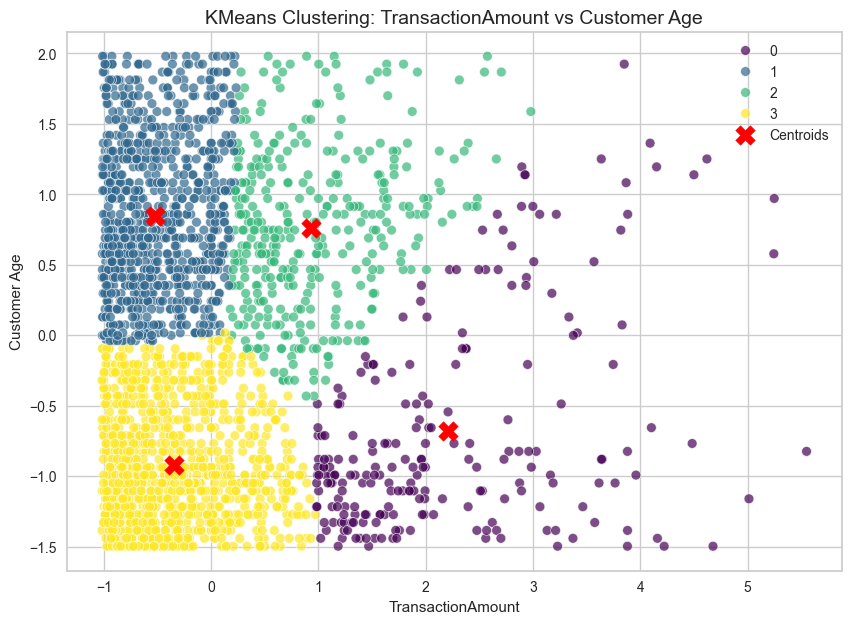

In [24]:
# Membuat visualisasi hasil 
X_2d = df_cluster[['TransactionAmount', 'CustomerAge']]

# Buat model KMeans (misal, pakai 5 klaster)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_2d)

# Ambil posisi centroid
centroids = kmeans.cluster_centers_

# Buat visualisasi scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_2d['TransactionAmount'], 
                y=X_2d['CustomerAge'],
                hue=labels,
                palette='viridis',
                alpha=0.7,
                s=50)

# Tambahkan centroid ke plot
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

# Label & judul
plt.title('KMeans Clustering: TransactionAmount vs Customer Age', fontsize=14)
plt.xlabel('TransactionAmount')
plt.ylabel('Customer Age')
plt.legend()
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

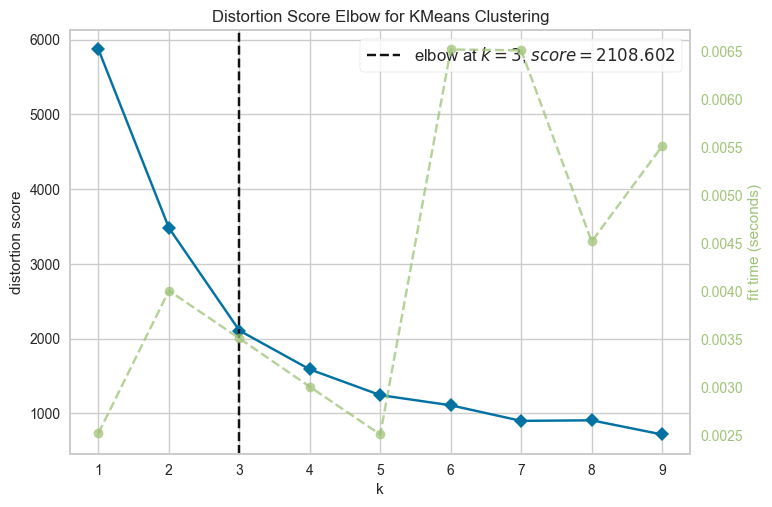

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_cluster)

PCA_2 = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

kmeans = KMeans(random_state=42)  # Atur random_state agar hasil tetap
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(PCA_2)
visualizer.show()

kmeanspca = KMeans(n_clusters=3, random_state=42)
kmeanspca.fit(PCA_2)
labels_pca = kmeanspca.labels_


In [26]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(PCA_2, labels_pca)
(f'Silhouette Score (dengan PCA): {score:.4f}')

'Silhouette Score (dengan PCA): 0.4713'

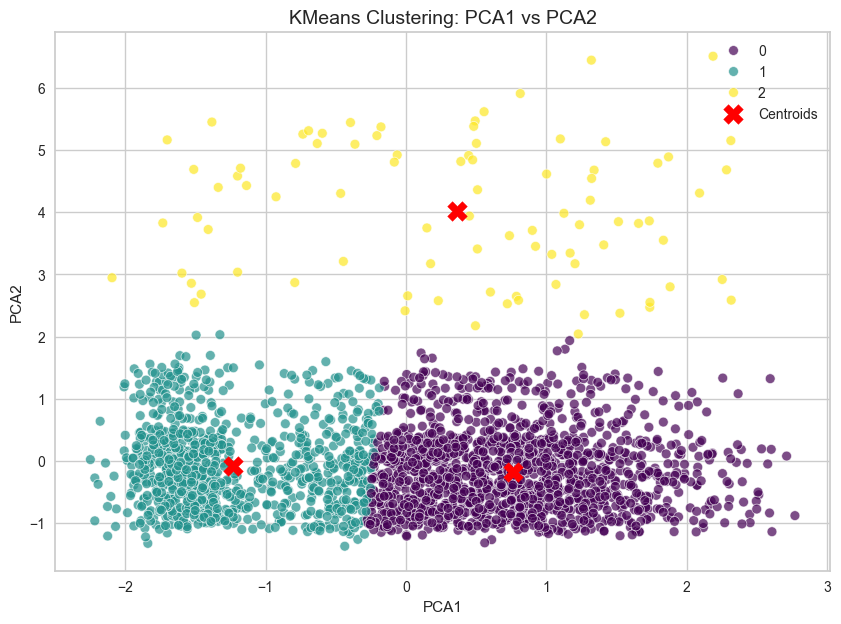

In [27]:
# Membuat visualisasi hasil 
X_2d_PCA = PCA_2[['PCA1', 'PCA2']]

# Buat model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans.fit_predict(X_2d_PCA)

# Ambil posisi centroid
centroids = kmeans.cluster_centers_

# Buat visualisasi scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_2d_PCA['PCA1'], 
                y=X_2d_PCA['PCA2'],
                hue=labels_pca,
                palette='viridis',
                alpha=0.7,
                s=50)

# Tambahkan centroid ke plot
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

# Label & judul
plt.title('KMeans Clustering: PCA1 vs PCA2', fontsize=14)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
PCA_model = kmeanspca
joblib.dump(PCA_model, "PCA_model_clustering.h5")


['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [29]:
df_cluster.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862e+00,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715e+00,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874e+00,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361e+00,-1.347656,-0.204629,0.886694
4,-0.972736,1.029568e-16,1.121495,-0.204629,0.594263


In [30]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
# Menentukan jumlah cluster yang digunakan
df_cluster['Target'] = labels  # labels adalah hasil dari model clustering

numeric_summary = (
    df_cluster
    .groupby('Target')[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]
    .agg(['mean', 'min', 'max'])
    .reset_index()
)

# Flatten multi-index kolom agar lebih rapi
numeric_summary.columns = ['_'.join(col).strip('_') for col in numeric_summary.columns.values]

# Format angka agar 2 desimal
for col in numeric_summary.columns:
    if col != 'Target':
        numeric_summary[col] = numeric_summary[col].apply(lambda x: f"{x:.2f}")

print("Ringkasan Statistik Numerik per Cluster:")
print(numeric_summary.to_string(index=False))



Ringkasan Statistik Numerik per Cluster:
 Target TransactionAmount_mean TransactionAmount_min TransactionAmount_max CustomerAge_mean CustomerAge_min CustomerAge_max TransactionDuration_mean TransactionDuration_min TransactionDuration_max LoginAttempts_mean LoginAttempts_min LoginAttempts_max AccountBalance_mean AccountBalance_min AccountBalance_max
      0                   2.21                  0.98                  5.55            -0.68           -1.50            1.92                     0.04                   -1.55                    2.58              -0.01             -0.20              6.53               -0.25              -1.29               2.49
      1                  -0.52                 -1.02                  0.23             0.85           -0.04            1.98                    -0.01                   -1.56                    2.56               0.02             -0.20              6.53                0.26              -1.28               2.52
      2                   0.9

## Karakteristik Tiap Cluster (Sebelum Inverse)

### **Cluster 1**
- **Transaction Amount**: Tinggi *(mean ≈ 2.21)*, dengan nilai **minimum** dan **maksimum** paling besar dibanding cluster lain.  
- **Account Balance**: Relatif rendah dibanding cluster lain *(mean ≈ -0.25)* — berada di urutan ke-3 tertinggi.  
> **Interpretasi**: Kelompok nasabah ini adalah tipe *living paycheck to paycheck*, yaitu jumlah transaksinya besar namun saldo tabungan rendah.

---

### **Cluster 2**
- **Transaction Amount**: Terendah *(mean ≈ -0.52)*, dengan nilai minimum dan maksimum kecil.  
- **Account Balance**: Paling tinggi *(mean ≈ 0.26)*.  
> **Interpretasi**: Tipe *Saving account* — jumlah transaksi kecil, tetapi saldo sangat tinggi.

---

### **Cluster 3**
- **Transaction Amount**: Tinggi *(mean ≈ 0.93)*, dengan rentang nilai besar.  
- **Account Balance**: Cukup tinggi *(mean ≈ 0.28)*.  
> **Interpretasi**: Tipe *wealthy spender* — transaksi besar namun tetap memiliki saldo tinggi.

---

### **Cluster 4**
- **Transaction Amount**: Rendah hingga menengah *(mean ≈ -0.35)*.  
- **Account Balance**: Paling rendah *(mean ≈ -0.29)*.  
> **Interpretasi**: Kemungkinan kelompok ini merupakan nasabah yang memiliki daya beli dan tabungan rendah.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [32]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_final = pd.concat([df_cluster, df_encoded], axis=1, join='inner') 
df_final['Target'] = labels  # labels adalah hasil dari model clustering

In [33]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_final.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [34]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
df_inverse_num = df_cluster.copy()
df_inverse_num[numeric_cols] = scaler.inverse_transform(df_inverse_num[numeric_cols])
df_inverse_num.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
0,14.09,70.000000,81.0,1.0,5112.21,1
1,376.24,68.000000,141.0,1.0,13758.91,2
2,126.29,19.000000,56.0,1.0,1122.35,3
3,184.50,26.000000,25.0,1.0,8569.06,3
4,13.45,44.678444,198.0,1.0,7429.40,1


In [35]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

df_inverse_cat = df_encoded.copy()

for col in encoders.keys():
        le = encoders[col]
        df_inverse_cat[col] = le.inverse_transform(df_inverse_cat[col].astype(int))

df_inverse_cat.head()

,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate
0,2023-04-11 16:29:14,Debit,San Diego,ATM,Doctor,2024-11-04 8:08:08
1,2023-06-27 16:44:19,Debit,Houston,ATM,Doctor,2024-11-04 8:09:35
2,2023-07-10 18:16:08,Debit,Mesa,Online,Student,2024-11-04 8:07:04
3,2023-05-05 16:32:11,Debit,Raleigh,Online,Student,2024-11-04 8:09:06
4,2023-10-16 17:51:24,Credit,Atlanta,Online,Student,2024-11-04 8:06:39


In [36]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

numeric_summary = (
    df_inverse_num
    .groupby('Target')[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]
    .agg(['mean', 'min', 'max'])
    .reset_index()
)

# Flatten multi-index kolom agar lebih rapi
numeric_summary.columns = ['_'.join(col).strip('_') for col in numeric_summary.columns.values]

# Format angka agar 2 desimal
for col in numeric_summary.columns:
    if col != 'Target':
        numeric_summary[col] = numeric_summary[col].apply(lambda x: f"{x:.2f}")

print("Ringkasan Statistik Numerik per Cluster:")
print(numeric_summary.to_string(index=False))



Ringkasan Statistik Numerik per Cluster:
 Target TransactionAmount_mean TransactionAmount_min TransactionAmount_max CustomerAge_mean CustomerAge_min CustomerAge_max TransactionDuration_mean TransactionDuration_min TransactionDuration_max LoginAttempts_mean LoginAttempts_min LoginAttempts_max AccountBalance_mean AccountBalance_min AccountBalance_max
      0                 943.21                584.41               1919.11            32.59           18.00           79.00                   122.55                   11.00                  300.00               1.12              1.00              5.00             4148.72             102.20           14804.70
      1                 145.83                  0.84                365.48            59.88           44.00           80.00                   119.07                   10.00                  299.00               1.14              1.00              5.00             6145.49             120.89           14942.78
      2                 570.0

## Karakteristik Tiap Cluster (Setelah Inverse)

### **Cluster 1**
- **Transaction Amount**: Tinggi *(mean ≈ 943)*, dengan nilai **minimum** dan **maksimum** paling besar dibanding cluster lain.  
- **Account Balance**: Relatif rendah dibanding cluster lain *(mean ≈ 4,148)* — berada di urutan ke-3 tertinggi.  
> **Interpretasi**: Kelompok nasabah ini adalah tipe *living paycheck to paycheck*, yaitu jumlah transaksinya besar namun saldo tabungan rendah.

---

### **Cluster 2**
- **Transaction Amount**: Terendah *(mean ≈ 145)*, dengan nilai minimum dan maksimum kecil.  
- **Account Balance**: Paling tinggi *(mean ≈ 6,145)*.  
> **Interpretasi**: Tipe *Saving account* — jumlah transaksi kecil, tetapi saldo sangat tinggi.

---

### **Cluster 3**
- **Transaction Amount**: Tinggi *(mean ≈ 570)*, dengan rentang nilai besar.  
- **Account Balance**: Cukup tinggi *(mean ≈ 6,198)*.  
> **Interpretasi**: Tipe *wealthy spender* — transaksi besar namun tetap memiliki saldo tinggi.

---

### **Cluster 4**
- **Transaction Amount**: Rendah hingga menengah *(mean ≈ 196)*.  
- **Account Balance**: Paling rendah *(mean ≈ 3,995)*.  
> **Interpretasi**: Kemungkinan kelompok ini merupakan nasabah yang memiliki daya beli dan tabungan rendah.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [37]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Gabungkan berdasarkan index
df_final_inverse = pd.concat([df_inverse_cat, df_inverse_num], axis=1,join='inner')

# Cek hasil
df_final_inverse.head()

,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
0,2023-04-11 16:29:14,Debit,San Diego,ATM,Doctor,2024-11-04 8:08:08,14.09,70.000000,81.0,1.0,5112.21,1
1,2023-06-27 16:44:19,Debit,Houston,ATM,Doctor,2024-11-04 8:09:35,376.24,68.000000,141.0,1.0,13758.91,2
2,2023-07-10 18:16:08,Debit,Mesa,Online,Student,2024-11-04 8:07:04,126.29,19.000000,56.0,1.0,1122.35,3
3,2023-05-05 16:32:11,Debit,Raleigh,Online,Student,2024-11-04 8:09:06,184.50,26.000000,25.0,1.0,8569.06,3
4,2023-10-16 17:51:24,Credit,Atlanta,Online,Student,2024-11-04 8:06:39,13.45,44.678444,198.0,1.0,7429.40,1


In [38]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_final_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.